# Reflections 1 through 4 


In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from collections import Counter


In [ ]:
df = pd.read_csv("homework_1.2.csv")


treated = df[df["X"] == 1]
control = df[df["X"] == 0]


treated_z = treated[["Z"]].values
control_z = control[["Z"]].values


nn = NearestNeighbors(n_neighbors=1)
nn.fit(control_z)


distances, indices = nn.kneighbors(treated_z)


farthest_distance = distances.max()

print("Farthest match distance:", farthest_distance)

Farthest match distance: 0.2102170871093757


In [3]:
# 1. In Coding Quiz 1, you are asked to find the distance of the farthest match in a set.  Is this farthest match distance too far to be a meaningful match?  How can you decide this?
# I used a radius of 0.2, and the fartherst distance I got was 0.2102 which is slight greater than 0.2 so I don't think it is a meaningful match 

In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


treated_Y = treated['Y'].values
control_Y = control['Y'].values

K = 3

nn = NearestNeighbors(n_neighbors=K)
nn.fit(control_z)
distances, indices = nn.kneighbors(treated_z)

effects = []
for i, idxs in enumerate(indices):
    y_treated = treated_Y[i]
    y_controls = control_Y[idxs]
    effect_i = y_treated - y_controls.mean()
    effects.append(effect_i)

avg_effect = np.mean(effects)

In [5]:
avg_effect = np.mean(effects)
print("Estimated effect (K-NN, K=3):", avg_effect)

Estimated effect (K-NN, K=3): 0.5577110921927757


In [6]:
# 2. In Coding Quiz 1, there are two approaches to matching: 
# (A) Picking the best match X = 0 corresponding to each X = 1 using Z values.
# (B) Using radius_neighbors to pick all matches X = 0 within a distance of 0.2 of each X = 1.

# Invent your own type of matching similar to 1 and 2 (or look one up on the internet), which has a different way to pick the matches in X = 0.  
# Clearly explain the approach you invented or found.


In [7]:
# Homework Reflection 1 Question 2
# By using K matches, I get more stable results because I average over several similar controls.
# There is no hard distance cut-off — each treated unit always gets K matches, even if they are a bit farther away.
# This method is flexible — I can also add weights or use more variables to improve the match quality.
#  K‑NN matching gives a simple, balanced way to find good control matches without strict rules, making the estimates more reliable.

In [8]:
# Homework Reflection 2 Question 1 
# 1 Invent an example situation that would use fixed effects.
# I want to study wherther longer break times increase worker productivity in an office 
# Collect data from employees every day for 3 months  and see how their productivity is after 3 months 
# Compare each employee to themselves over time — seeing how changes in their break time affect their productivity holding their personal baseline constant. 

Bootstrap estimate of the variance of the mean: 0.001313


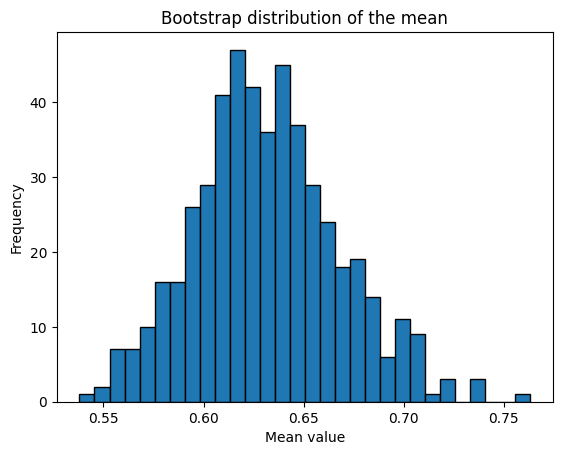

In [ ]:
# Homework Reflection 2 Question 2

# 2. Write a Python program that performs a bootstrap simulation to find the variance in the mean of the Pareto distribution when different samples are taken.  
# Explain what you had to do for this.  As you make the full sample size bigger (for the same distribution), what happens to the variance of the mean of the samples?  
# Does it stay about the same, get smaller, or get bigger?
# As I made the sample size bigger, the variance became smaller 
# I took one sample from the Pareto distribution, then repeatedly resampled it with replacement and calculated the mean each time. 
# Finally, I measured how much these means vary to estimate the variance of the mean.


import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
shape = 2.5     
sample_size = 1000
n_bootstrap = 500


sample = np.random.pareto(shape, sample_size)


bootstrap_means = []

for _ in range(n_bootstrap):
    resample = np.random.choice(sample, size=sample_size, replace=True)
    bootstrap_means.append(resample.mean())


mean_variance = np.var(bootstrap_means)
print(f"Bootstrap estimate of the variance of the mean: {mean_variance:.6f}")


plt.hist(bootstrap_means, bins=30, edgecolor='k')
plt.title("Bootstrap distribution of the mean")
plt.xlabel("Mean value")
plt.ylabel("Frequency")
plt.show()

In [ ]:

# Homework Reflection 3 Question 1 

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


df = pd.read_csv("homework_3.1.csv")


df['after'] = (df['time'] >= 50).astype(int)
df['time_sq'] = df['time'] ** 2
df['time_x_after'] = df['time'] * df['after']
df['time_sq_x_after'] = df['time_sq'] * df['after']


X = df[['time', 'time_sq', 'after', 'time_x_after', 'time_sq_x_after']].values
y = df['value1'].values


model = LinearRegression()
model.fit(X, y)


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


print("\nOrder: [time, time_sq, after, time_x_after, time_sq_x_after]")

# Add a Time Squared term and interact it with the “after” indicator. If the interaction’s coefficient isn’t zero, the curvature changed after the event.
# The last coefficient tells us that the curvature changed when time = 50 



Intercept: 0.9968701528517012
Coefficients: [-2.76210766e-02  3.83927638e-04 -2.31864820e+00  6.29247121e-02
  2.68935746e-05]

Order: [time, time_sq, after, time_x_after, time_sq_x_after]


In [ ]:
# Homework Reflection 3 Question 2 
# Create your own scenario that illustrates differences-in-differences. Describe the story behind the data and show whether there is a nonzero treatment effect.

# A company wants to test if providing healthy meals in the cafeteria improves employee health.

# In 2022, Office A switches its cafeteria to serve only healthy meals.

# Office B, keeps its usual cafeteria options (no change).

# Collect the BMI for both offices before the change and after the change 
# Before Change 
# Office A: BMI = 28 
# Office B: BMI = 27 
# After Change 
# Office A: BMI = 26 
# Office B: BMI = 27 

# Difference-in-Differences calculation:
# Change for each group:

# Office A: 28 → 26 → -2

# Office B: 27 → 27 → 0

# Difference-in-Difference Effect 
# -2 - 0 = -2 

# The control group (Group B) BMI did not change at all
# Employees in Office A BMI went down indicating that the healthy food choice was a good idea 
# The Difference in Difference Effect was -2 indicates a nonzero treatment effect
# The control group’s BMI doesn’t change, then the whole drop in the treatment group shows the effect. So here, the healthy meals lowered BMI by 2 points.






In [ ]:
# Homework Reflection 4 
# 1 The Coding Quiz gives two options for instrumental variables.  
# For the second item (dividing the range of W into multiple ranges), 
# explain how you did it, show your code, and discuss any issues you encountered.

# In Some bins, the difference in X between Z = 1 and Z = 0 was nearly 0, making the denominator 0 thus making the solution undefined. 
# By the Use of NaN and dropping NaN values before calculating the average 
# Quantile Bins (qcut) was used to make sure each bin has the same number of observations making the estimates better
# Outliers were removed 

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("homework_4.1.csv")


df['W_bin'] = pd.qcut(df['W'], q=10)


def local_wald(group):
    diff_Y = group[group['Z'] == 1]['Y'].mean() - group[group['Z'] == 0]['Y'].mean()
    diff_X = group[group['Z'] == 1]['X'].mean() - group[group['Z'] == 0]['X'].mean()
    return diff_Y / diff_X if diff_X != 0 else np.nan


local_estimates = df.groupby('W_bin').apply(local_wald).dropna()


average_effect = local_estimates.mean()

print("Local Wald estimates per bin:\n", local_estimates)
print("\nAverage effect:", average_effect)

Local Wald estimates per bin:
 W_bin
(-3.304, -1.277]     1.539745
(-1.277, -0.855]     1.315313
(-0.855, -0.547]     1.609005
(-0.547, -0.277]     1.618229
(-0.277, -0.0322]    1.458265
(-0.0322, 0.226]     1.538094
(0.226, 0.491]       1.602899
(0.491, 0.814]       1.485316
(0.814, 1.303]       1.526583
(1.303, 4.783]       1.395514
dtype: float64

Average effect: 1.5088963715407195


/tmp/ipykernel_15574/1723004278.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  local_estimates = df.groupby('W_bin').apply(local_wald).dropna()
/tmp/ipykernel_15574/1723004278.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  local_estimates = df.groupby('W_bin').apply(local_wald).dropna()


In [ ]:
# 2. Plot the college outcome (Y) vs. the test score (X) in a small range of test scores around 80. 
# On the plot, compare it with the Y probability predicted by logistic regression. 
# The ground truth Y value is 0 or 1; don't just plot 0 or 1 - that will make it unreadable. 
# Find some way to make it look better than that.


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_5776/2269744011.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_window['X_bin'] = pd.cut(df_window['X'], bins=30)
/tmp/ipykernel_5776/2269744011.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = df_window.groupby('X_bin').agg({'X': 'mean', 'Y': 'mean'})


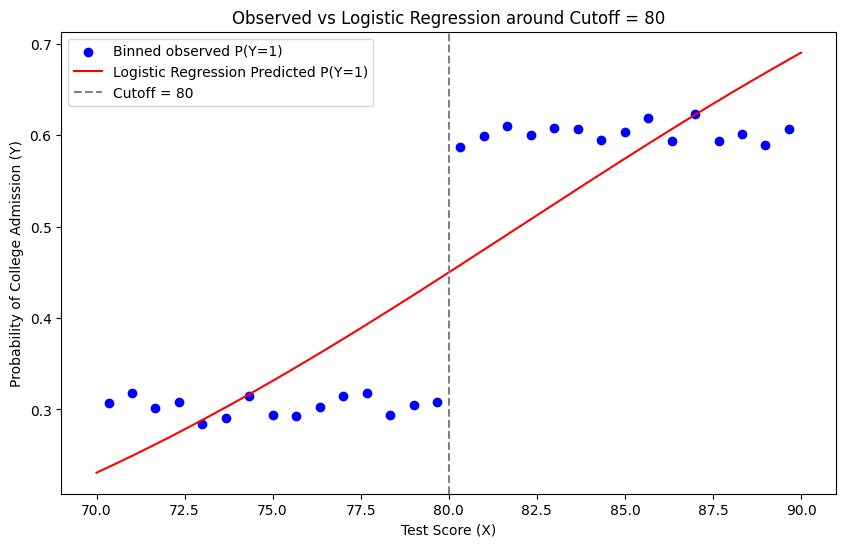

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


df = pd.read_csv("homework_4.2.a.csv")


cutoff = 80
window = 10


df_window = df[(df['X'] >= (cutoff - window)) & (df['X'] <= (cutoff + window))]


X_window = df_window[['X']]
Y_window = df_window['Y']
model = LogisticRegression()
model.fit(X_window, Y_window)


x_grid = np.linspace(cutoff - window, cutoff + window, 200).reshape(-1, 1)
y_pred = model.predict_proba(x_grid)[:, 1]


df_window['X_bin'] = pd.cut(df_window['X'], bins=30)
binned = df_window.groupby('X_bin').agg({'X': 'mean', 'Y': 'mean'})


plt.figure(figsize=(10, 6))
plt.scatter(binned['X'], binned['Y'], label='Binned observed P(Y=1)', color='blue')
plt.plot(x_grid, y_pred, label='Logistic Regression Predicted P(Y=1)', color='red')
plt.axvline(cutoff, color='gray', linestyle='--', label='Cutoff = 80')
plt.xlabel('Test Score (X)')
plt.ylabel('Probability of College Admission (Y)')
plt.title('Observed vs Logistic Regression around Cutoff = 80')
plt.legend()
plt.show()
